### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$

 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla\cdot \boldsymbol{D}  = {0}$

 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})  + \frac{G_c}{l}\left(1-s\right) = 0$

where 

$\boldsymbol{\sigma} = \biggl(\mathbb{C}_{mod} \boldsymbol{\epsilon} -s^2\mathbb{E}^T\boldsymbol{E}\biggr) $

$\boldsymbol{D} = \biggr({s^2\boldsymbol{K}\boldsymbol{E}} +  s^2\mathbb{E}\boldsymbol{\epsilon}\biggl) $

$\mathcal{E} = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon} - 0.5 (\overset{3}{\mathbb{E}})^T\boldsymbol{E}:\boldsymbol{\epsilon}^{+})$

$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$

 # Weak Form

### For Piezo-elasticity part

 $a_{\text{EM}}((\boldsymbol{u},\varphi),(\boldsymbol{v},\gamma)) = \int_{\Omega}\biggl(\boldsymbol{\epsilon}(\boldsymbol{v}):\left(\mathbb{C}_{\text{mod}}\, \boldsymbol{\epsilon} \,-\,s^2(\overset{3}{\mathbb{E}})^T\boldsymbol{E}(\varphi)\right) - \boldsymbol{E}(\gamma)\cdot s^2\bigl(\boldsymbol{K}\boldsymbol{E}(\varphi) + \, \overset{3}{\mathbb{E}}\boldsymbol{\epsilon}\bigr)\biggr) \,d\Omega$
 
 $b_{\text{EM}}(\boldsymbol{v}, \gamma) = 0$

### For phase-field part
 
  $a_{\text{PF}}(s,w) = \int_{\Omega}\bigl(G_cl_s\nabla s \cdot \nabla w + 2s w\mathcal{H}(\mathcal{E}) + \frac{G_c}{l_s} s w\bigr)\,d\Omega\\$
  $b_{\text{PF}}(w) = \int_{\Omega}w\frac{G_c}{l_s} d\Omega$

In [1]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.TensorValues
using PyPlot

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [2]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/3)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2,Float64,9}(0.6666666666666667, 0.0, -0.3333333333333333, 0.0, 0.5, 0.0, -0.3333333333333333, 0.0, 0.6666666666666667)

In [3]:
const L = 19.1
const LL = L/2 - 4
const SO = 1
const SI = 0.05
const H = 9
const CH = 4         #Crack height
const CW = 0.46      #Crack Width
const lsp = 0.08     #length factor
const hf = 0.06/2.1  #Mesh size parameter
const hfc = 0.06/50  #Mesh size parameter
const h = 50*hf      #Mesh size parameter
const LW = CW
const FMR = CW/2

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)
p2 = gmsh.model.geo.addPoint(SO, 0, 0.0, h)
p3 = gmsh.model.geo.addPoint(LL-0.5*CW, 0, 0.0, h)
p4 = gmsh.model.geo.addPoint(LL-0.5*CW, CH-0.5*CW, 0.0, h)
p5 = gmsh.model.geo.addPoint(LL, CH, 0.0, hfc)
p6 = gmsh.model.geo.addPoint(LL+0.5*CW, CH-0.5*CW, 0.0, h)
p7 = gmsh.model.geo.addPoint(LL+0.5*CW,0.0, 0.0, h)
p8 = gmsh.model.geo.addPoint(L-SO,0.0, 0.0, h)
p9 = gmsh.model.geo.addPoint(L,0.0, 0.0, h)
p10 = gmsh.model.geo.addPoint(L, H, 0.0, h)
p11 = gmsh.model.geo.addPoint((L/2)+LW, H , 0.0, h)
p12 = gmsh.model.geo.addPoint((L/2)-LW, H , 0.0, h)
p13 = gmsh.model.geo.addPoint(0, H , 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p12)
l12 = gmsh.model.geo.addLine(p12, p13)
l13 = gmsh.model.geo.addLine(p13, p1)                 

cl1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13]) 

ps1 = gmsh.model.geo.addPlaneSurface([cl1])

pg1 = gmsh.model.addPhysicalGroup(2, [ps1])

pg2 = gmsh.model.addPhysicalGroup(0, [p2])
pg3 = gmsh.model.addPhysicalGroup(0, [p8])
pg4 = gmsh.model.addPhysicalGroup(1, [l11])
pg5 = gmsh.model.addPhysicalGroup(1, [l13])
pg6 = gmsh.model.addPhysicalGroup(1, [l9])

gmsh.model.setPhysicalName(2, pg1, "Domain")
gmsh.model.setPhysicalName(0, pg2, "DirichletLeft")
gmsh.model.setPhysicalName(0, pg3, "DirichletRight")
gmsh.model.setPhysicalName(1, pg4, "LoadLine")
gmsh.model.setPhysicalName(1, pg5, "ElectricPotentialLeft")
gmsh.model.setPhysicalName(1, pg6, "ElectricPotentialRight")

gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", (LL-5*FMR))
gmsh.model.mesh.field.setNumber(11, "XMax", ((L/2)+LW+2*FMR))
gmsh.model.mesh.field.setNumber(11, "YMin", 0.95*CH)
gmsh.model.mesh.field.setNumber(11, "YMax", H)

gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("4mmEccentricNotchedBeam.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Meshing curve 9 (Line)
Info    : Meshing curve 10 (Line)
Info    : Meshing curve 11 (Line)
Info    : Meshing curve 12 (Line)
Info    : Meshing curve 13 (Line)
Info    : Done meshing 1D (0.002949 s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Delaunay)
Info    : Done meshing 2D (1.60176 s)
Info    : 46993 vertices 93997 elements
Info    : Writing '4mmEccentricNotchedBeam.msh'...
Info    : Done writing '4mmEccentricNotchedBeam.msh'


In [4]:
model = GmshDiscreteModel("4mmEccentricNotchedBeam.msh")
writevtk(model,"4mmEccentricNotchedBeam")

Info    : Reading '4mmEccentricNotchedBeam.msh'...
Info    : 27 entities
Info    : 46993 nodes
Info    : 93745 elements
Info    : Done reading '4mmEccentricNotchedBeam.msh'


3-element Array{Array{String,1},1}:
 ["4mmEccentricNotchedBeam_0.vtu"]
 ["4mmEccentricNotchedBeam_1.vtu"]
 ["4mmEccentricNotchedBeam_2.vtu"]

In [5]:
ElecF = 5
phiMaxApp = (ElecF/10)*L*1e3
thickness = 5.1

5.1

In [6]:
cd("Result4mmEccentricNotchedBeamElecField$ElecF")

In [7]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

93696-element Array{Int8,1}:
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 ⋮
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6

In [8]:
const Mat_tag = get_tag_from_name(labels,"Domain")

6

## Input paramters for Piezo-Electric Material Properties

#### Input elasticity parameters

In [9]:
const λ_mat = 77.8e3 
const μ_mat = 30.6e3

30600.0

#### Input piezo-electric parameters

In [10]:
const C1 = -6.98e-3
const C2 = -6.06e-3
const C3 = 16.00e-3

0.016

#### Input permitivity parameters

In [11]:
const K₁₁_mat = 6e-9
const K₂₂_mat = 6e-9

6.0e-9

#### Input fracture parameters

In [12]:
const Gc = 7e-3
const η = 1e-10

1.0e-10

### Third order piezoelectric tensor

In [13]:
p = VectorValue(1,0)
I = [1 0; 0 1]
K1 = zeros(2,2,2)
K2 = zeros(2,2,2)
K3 = zeros(2,2,2)
for i = 1:2, j = 1:2, k= 1:2
    K1[i,j,k] = p[i]*I[j,k]
end
for i = 1:2, j = 1:2, k= 1:2
    K2[i,j,k] = p[i]*p[j]*p[k]
end
for i = 1:2, j = 1:2, k= 1:2
    K3[i,j,k] = 0.5*(p[j]*I[i,k] + p[k]*I[i,j])
end
K = C1*K1+C2*K2+C3*K3
const e_mat = ThirdOrderTensorValue(K)

ThirdOrderTensorValue{2,2,2,Float64,8}(0.002960000000000001, 0.0, 0.0, 0.008, 0.0, 0.008, -0.00698, 0.0)

### Second order electrical permittivity tensor

In [14]:
const K_mat = TensorValue(K₁₁_mat,0.0,0.0, K₁₁_mat)

TensorValue{2,2,Float64,4}(6.0e-9, 0.0, 0.0, 6.0e-9)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u})) =  \mathbb{C}\,\boldsymbol{\epsilon}$

$\sigma_{elasMod}(\epsilon(\boldsymbol{u}),s) =  \mathbb{C}_{mod}\,\boldsymbol{\epsilon}$

$\sigma_{piezo}(\boldsymbol{E}(\phi)) = - \mathbb{E}^T\,\boldsymbol{E}$

or, $\sigma_{piezo}(\nabla\phi) =  \mathbb{E}^T\,\boldsymbol{\nabla}\phi$

$\sigma_{piezoMod}(\nabla\phi,s) =  s^2\mathbb{E}^T\,\boldsymbol{\nabla}\phi$

In [15]:
σ_elas(ε) = λ_mat*tr(ε)*one(ε) + 2*μ_mat*ε

function σ_elasMod(ε, ε_in, s_in)  
 if tr(ε_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(ε)
  elseif tr(ε_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(ε) + I4_vol⊙ σ_elas(ε)
  end  
    return σ
end

σ_elasMod (generic function with 1 method)

In [16]:
σ_piezo(∇) = ∇ ⋅ e_mat

σ_piezoMod(∇, ∇_in, s_in) = (s_in^2 + η)*σ_piezo(∇)

σ_piezoMod (generic function with 1 method)

### Electric Displacement

$\boldsymbol{D}_{elas}(ε(\boldsymbol{u}),tag) = \mathbb{E}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{elasMod}(ε(\boldsymbol{u}),s,tag) = s^2\mathbb{E}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{piezo}(\boldsymbol{E}(\phi)) = -\boldsymbol{K}\boldsymbol{E} $

or, $\boldsymbol{D}_{piezo}(\nabla\phi)  = \boldsymbol{K}\boldsymbol{\nabla} \phi$

$\boldsymbol{D}_{piezoMod}(\nabla\phi,s)  = s^2\boldsymbol{K}\boldsymbol{\nabla} \phi$

In [17]:
D_elasMod(ε, ∇_in, s_in) = (s_in^2 + η)*(e_mat ⋅² ε)

D_elasMod (generic function with 1 method)

In [18]:
D_piezo(∇) = K_mat ⋅ ∇

function D_piezoMod(∇, s_in)   
    return (s_in^2 + η)*D_piezo(∇)
end

D_piezoMod (generic function with 1 method)

In [19]:
function ψPos(ε_in, ∇_in)   
 if tr(ε_in) >= 0
    ψPlus = 0.5*(ε_in ⊙ σ_elas(ε_in)) + 0.5*(σ_piezo(∇_in) ⊙ ε_in)
 elseif tr(ε_in) < 0
    ψPlus = 0.5*((I4_dev ⊙ σ_elas(ε_in)) ⊙ (I4_dev ⊙ ε_in)) + 0.5*(σ_piezo(∇_in) ⊙ (I4_dev ⊙ ε_in))        
 end 
    return ψPlus
end

ψPos (generic function with 1 method)

In [20]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

## FE formulation

In [21]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = solve(op)
  qh
end

project (generic function with 1 method)

In [22]:
order = 1
degree = 2*order

2

In [23]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [24]:
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 33
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 1329469345924427074

In [25]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 93696
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 10715402184540810599

In [26]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletLeft","DirichletRight","LoadLine"],
          dirichlet_masks=[(true,true), (false,true), (false,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 93696
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 10715402184540810599

In [27]:
reffe_ElecPot = ReferenceFE(lagrangian,Float64,order)
V0_ElecPot  = TestFESpace(model,reffe_ElecPot;
  conformity=:H1,
  dirichlet_tags=["ElectricPotentialLeft","ElectricPotentialRight"])

UnconstrainedFESpace()

In [28]:
V0 = MultiFieldFESpace([V0_Disp,V0_ElecPot])

MultiFieldFESpace()

In [29]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [30]:
 function   stepDispElecPot(uh_in,phih_in,sh_in,vApp,phiApp)
    
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        uApp3(x) = VectorValue(0.0,-vApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3])
    
        phiApp1(x) = phiApp
        phiApp2(x) = 0
        U_ElecPot = TrialFESpace(V0_ElecPot,[phiApp1,phiApp2])
    
        U = MultiFieldFESpace([U_Disp,U_ElecPot])
    
        a((u,ϕ),(v,ψ)) = ∫( (ε(v) ⊙ (σ_elasMod∘(ε(u),ε(uh_in),sh_in))) + (∇(v) ⊙ (σ_piezoMod ∘(∇(ϕ),∇(phih_in),sh_in))) - (∇(ψ)⋅(D_piezoMod∘ (∇(ϕ),sh_in))) + (∇(ψ)⋅(D_elasMod∘(ε(u),∇(phih_in),sh_in))) )*dΩ
        b((v,ψ)) = 0.0
    
        op = AffineFEOperator(a,b,U,V0)
        uhPhi = solve(op)
        uh_out,phih_out = uhPhi
    
    return uh_out,phih_out
end

stepDispElecPot (generic function with 1 method)

In [31]:
vApp = 0
phiApp = 0
delv = 1e-4
vAppMax = 0.005
innerMax = 10
count = 0

Load = Float64[]
Displacement = Float64[]

ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ϕPrev = CellState(0.0,dΩ)
ϕh = project(ϕPrev,model,dΩ,order)


while vApp .< vAppMax 
    count = count .+ 1
    
    if count <= 5
        phiApp = phiApp + (phiMaxApp/5)
        vApp = vApp
    else
        phiApp = phiMaxApp
        vApp = vApp .+ delv
    end
    
    print("\n Entering displacemtent step$count :", float(vApp))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(RelErr))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,ϕh = stepDispElecPot(uh,ϕh,sh,vApp,phiApp)
        
        ψhPos_in = ψPos∘(ε(uh),∇(ϕh))      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < 1e-8
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),ε(uh),sh)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_piezoMod∘(∇(ϕh),∇(ϕh),sh) ) )  *dΓ_Load)
    
    push!(Load, thickness*Node_Force[2])
    push!(Displacement, vApp)
    if mod(count,2) == 0
         writevtk(Ω,"results_4mmEccentricNotchedBeam$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh)])
    end
end


 Entering displacemtent step1 :0.0
 Relative error = 2.9116980516226324e-17
 Entering displacemtent step2 :0.0
 Relative error = 5.088489564953543e-6
 Relative error = 1.5265234609904502e-5
 Relative error = 2.8374665125558778e-9

LoadError: [91mInterruptException:[39m

In [32]:
 writevtk(Ω,"results_4mmEccentricNotchedBeam$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh)])

(["results_4mmEccentricNotchedBeam2.vtu"],)

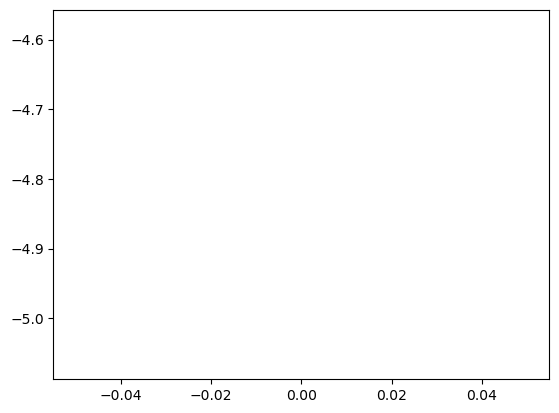

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8f4d3fcfd0>

In [33]:
plot(Displacement,-Load)

In [34]:
maximum(-Load)

-4.822422361797794

In [35]:
cd("../DataLoadDispResult4mmEccentricNotchedBeam")

In [36]:
using DelimitedFiles
Disp = writedlm("DispDataResult4mmEccentricNotchedBeam$ElecF ls$lsp.csv",  Displacement, ',')
Force = writedlm("LoadDataResult4mmEccentricNotchedBeam$ElecF ls$lsp.csv",  Load, ',')